In [1]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [2]:
%matplotlib inline

In [3]:
country_code = 'USA'

## Inflation DataSet
Data Downloaded from "https://data.worldbank.org/indicator/FR.INR.RINR?locations=US" 
<br/>Loaded into a pandas dataset & Visualize the Inflation of United States over the years

In [4]:
# Inflation Data for all countries
raw_inflation_data = pd.read_excel('./data/country_inflation_data.xls', skiprows=3)
raw_inflation_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

In [5]:
# Structure the Data so that it can be interpreted easily
df_inflation_data = pd.melt(raw_inflation_data, id_vars=['Country Code'], var_name="Year", value_name="Inflation")
df_inflation_data.index = df_inflation_data['Country Code']
df_inflation_data['Year'] = df_inflation_data['Year'].astype('int')
df_inflation_data.drop(columns=['Country Code'], inplace=True)
df_inflation_data.dropna(inplace=True)
df_inflation_data.tail(5)

,Year,Inflation
Country Code,,
VNM,2021,1.834716
WLD,2021,3.423629
WSM,2021,3.133205
XKX,2021,3.353691
ZAF,2021,4.611672


In [6]:
# Inflation Data for USA
usa_inflation_data = df_inflation_data.loc[country_code]
usa_inflation_data.head(2)

,Year,Inflation
Country Code,,
USA,1960,1.457976
USA,1961,1.070724


## Interest Rates Dataset
How has the Federal Reserve responded to the Inflationary Pressures?<br/>
It can come evident from the interest rate dataset.<br/>
Loading the interest rate database and visually Ploting them<br/>
Data Downloaded from https://data.worldbank.org/indicator/FR.INR.RINR?locations=US


In [7]:
# Inflation Data for all countries
raw_interest_data = pd.read_excel('./data/country_interest_rates.xls', skiprows=3)
raw_interest_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

In [8]:
# Structure the Data so that it can be interpreted easily
df_interest_data = pd.melt(raw_interest_data, id_vars=['Country Code'], var_name="Year", value_name="InterestRates")
df_interest_data.index = df_interest_data['Country Code']
df_interest_data['Year'] = df_interest_data['Year'].astype('int')
df_interest_data.drop(columns=['Country Code'], inplace=True)
df_interest_data.dropna(inplace=True)
df_interest_data.tail(5)

,Year,InterestRates
Country Code,,
VUT,2020,0.277822
WSM,2020,8.471778
ZAF,2020,2.313127
ZMB,2020,-3.749081
ZWE,2020,-79.803157


In [9]:
# Inflation Data for USA
usa_interest_data = df_interest_data.loc[country_code]
usa_interest_data.head(2)

,Year,InterestRates
Country Code,,
USA,1961,3.107885
USA,1962,3.215346


## Merge Inflation and Interest Rate Datasets 
Merging interest rates and inflation data in to a single dataframe so that we can fetch the correlation

In [10]:
usa_inflation_interest_df = pd.merge(usa_inflation_data, usa_interest_data, on=["Year"])
usa_inflation_interest_df.index = usa_inflation_interest_df['Year']
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df["Year"].apply(lambda x: (usa_inflation_interest_df.loc[x+1]["InterestRates"]) if x < 2020 else 0.0)
usa_inflation_interest_df = usa_inflation_interest_df.drop(columns=['Year'])
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df['Interest_Rate_Next_Year'].astype("float")
usa_inflation_interest_df.tail(20)


,Inflation,InterestRates,Interest_Rate_Next_Year
Year,,,
2001,2.826171,4.626757,3.045071
2002,1.586032,3.045071,2.224101
2003,2.270095,2.224101,1.604589
2004,2.677237,1.604589,2.981357
2005,3.392747,2.981357,4.786448
2006,3.225944,4.786448,5.223406
2007,2.852672,5.223406,3.082411
2008,3.839100,3.082411,2.468829
2009,-0.355546,2.468829,2.060737


In [11]:
inflation_interest_correlation = usa_inflation_interest_df.corr(method='pearson')
inflation_interest_correlation

,Inflation,InterestRates,Interest_Rate_Next_Year
Inflation,1.000000,0.076389,0.179262
InterestRates,0.076389,1.000000,0.856736
Interest_Rate_Next_Year,0.179262,0.856736,1.000000


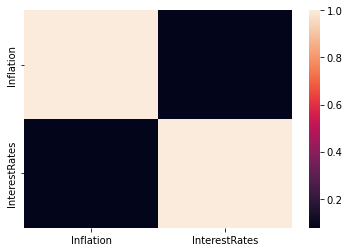

In [12]:
# Plot the heatmap signifying the correlation between Inflation & Interest Rates
sns.heatmap(usa_inflation_interest_df[['Inflation', 'InterestRates']].corr())
plt.show()

### Correlation between interest rates and inflation

We don't see a  string correlation between interest rates and inflation and infact we see some cases same side movement and in some cases an opposite movement as depicted in the graph below

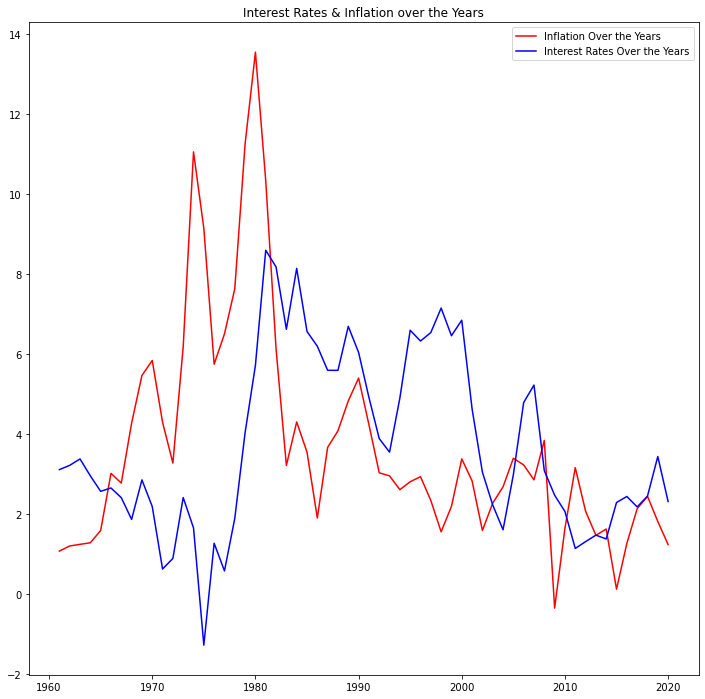

In [13]:
plt.figure(figsize=(12,12))
plt.plot(usa_inflation_interest_df['Inflation'], color='red', label='Inflation Over the Years')
plt.plot(usa_inflation_interest_df['InterestRates'], color='blue', label='Interest Rates Over the Years')
plt.title("Interest Rates & Inflation over the Years")
plt.legend()
plt.show()

## Indexes Investment Strategy
### Allocating portfolio across S&P 500, Russell 3000 companies

S&P 500 - Top 500 Companies in US Markets launched in 1923 tracking 90 stocks, expanded to 500 stocks from 1957
RUA - Russell Top 3000 companies launched in 1984 tracks top 3000 companies

In [14]:
#ticker = '^W5000, ^RUA, ^GSPC'
index_tickers = '^RUA, ^GSPC'
target_inflation_metric = '7'
start_date = '1988-01-01'
end_date = '1971-01-01'

In [15]:
# Price Data
price_data = bt.get(index_tickers, start=start_date)
price_data.rename(columns = {'gspc': 'SP500', 'rua': 'Russell3000'}, inplace=True)
print(price_data.head(5))

            Russell3000       SP500
Date                               
1988-01-04   143.199997  255.940002
1988-01-05   144.929993  258.630005
1988-01-06   145.289993  258.890015
1988-01-07   146.350006  261.070007
1988-01-08   137.779999  243.399994


#### Plots of SP 500 & Russell funds over the years

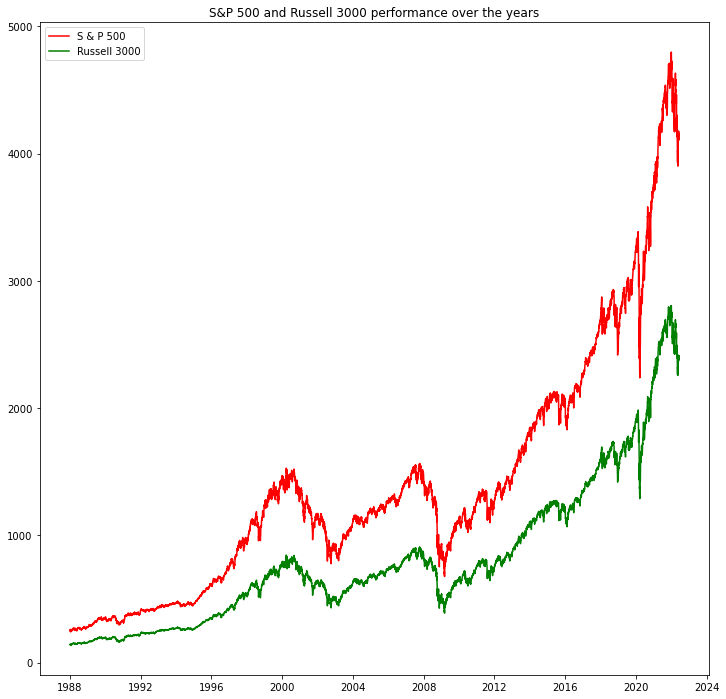

In [16]:
plt.figure(figsize=(12, 12))
plt.plot(price_data['SP500'], color='red', label='S & P 500')
plt.plot(price_data['Russell3000'], color='green', label='Russell 3000')
plt.title('S&P 500 and Russell 3000 performance over the years')
plt.legend()
plt.show()

In [17]:
price_data['year'] = pd. DatetimeIndex(price_data.index).year
year_wise_df = price_data.groupby(by='year').agg(
    {'SP500' : 'mean', 'Russell3000': 'mean'})
year_wise_df['Year'] = year_wise_df.index
year_wise_df = pd.merge(usa_inflation_interest_df, 
                        year_wise_df, 
                        on=["Year"])
year_wise_df.tail(5)


,Year,Inflation,InterestRates,Interest_Rate_Next_Year,SP500,Russell3000
28,2016,1.261583,2.436851,2.175694,2094.651264,1236.001071
29,2017,2.130110,2.175694,2.444494,2449.076379,1451.361832
30,2018,2.442583,2.444494,3.436010,2748.834658,1628.050924
31,2019,1.812210,3.436010,2.311111,2918.631300,1715.662185
32,2020,1.233584,2.311111,0.000000,3219.359242,1884.866533


### Lets Work on Trading Strategies

In [18]:
first_strategy = bt.Strategy('Equal_Weight_Index_Strategy',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                            ])

## Target Interest Metric

In [19]:
target_interest_metric = 6.5

## Execute Trading Strategies and fetch CAGR

In [52]:
interest_from, interest_to = int(target_interest_metric), round(target_interest_metric)
if(interest_from == interest_to):
    interest_to = interest_from + 1

# Target Years Based on the Interest Rates
target_years = year_wise_df[year_wise_df['InterestRates'].between(interest_from, interest_to)][
    'Year'].sort_values(ascending=False)
target_year_list = target_years.to_list()

lst_year = []
lst_cagr = []
lst_sharpe = []
lst_sortino = []

for yr in target_years:
    start_date = str(yr) + '-01-01'
    end_date = str((yr+1)) + '-01-01'
    
    index_price_data = bt.get(index_tickers, start = start_date, end = end_date)
    index_price_data
    
    bt_backtest = bt.Backtest(first_strategy, index_price_data)
    bt_res = bt.run(bt_backtest)
    
    #bt_res.plot(title="Index Equal Weight Strategy")
    #plt.show()
    
    bt_stats = bt_res.stats

    lst_year.append(yr)
    lst_cagr.append(round(bt_stats.loc['cagr']['Equal_Weight_Index_Strategy'] * 100, 2))
    lst_sharpe.append(round(bt_stats.loc['daily_sharpe']['Equal_Weight_Index_Strategy'], 2))
    lst_sortino.append(round(bt_stats.loc['daily_sortino']['Equal_Weight_Index_Strategy'], 2))


In [51]:
pd.DataFrame({ "year": lst_year, "cagr": lst_cagr, "sharpe": lst_sharpe, "sortino": lst_sortino})

ValueError: All arrays must be of the same length